2025-11-13 11:58:57.314 - pysb.simulator.scipyode - WARNING - [_interactive_] This system of ODEs will be evaluated in pure Python. This may be slow for large models. We recommend installing the 'cython' package for compiling the ODEs to C code. This warning can be suppressed by specifying compiler='python'.


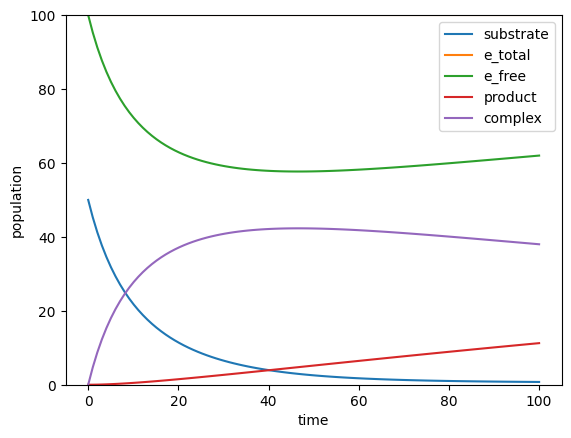

In [10]:
from pysb import *
from pysb.simulator import ScipyOdeSimulator
from pylab import linspace, plot, xlabel, ylabel, show
from pysb.macros import *

# A simple model with a reversible binding rule
Model()

# Declare the monomers
Monomer('S', ['binding', 'state'], {'state':['sub', 'pro']})
Monomer('E', ['bind'])

# Declare the parameters
Parameter('k1', 1e-3)
Parameter('km1', 1e-3)
Parameter('kc', 0.003)
Parameter('E_0', 100)
Parameter('S_0', 50)

# Declare the binding rule
Rule('E_binds_S', E(bind=None) + S(state = 'sub', binding=None) | E(bind = 1) % S(state = 'sub',binding = 1), k1, km1)

Rule('Dissociation', E(bind = 1) % S (binding =1, state = 'sub') >> E(bind = None) + S(state = 'pro', binding = None), kc)

# Declare the initial conditions
Initial(E(bind=None), E_0)
Initial(S(binding=None, state = 'sub'), S_0)



# Observe the complex
Observable('E_total',E())
Observable('E_FREE',E(bind=None))
Observable('Substrate',S(binding = None, state = 'sub'))
Observable('Product', S(binding=None, state='pro'))
Observable('Complex',E(bind = 1)%S(binding = 1, state = 'sub'))

%matplotlib inline
from pysb.integrate import odesolve
import matplotlib.pyplot as plt
import numpy as np

tspan = np.linspace(0, 100, 100)
y = odesolve(model, tspan)

plt.plot(tspan, y['Substrate'], label="substrate")
plt.plot(tspan, y['E_total'], label="e_total")
plt.plot(tspan, y['E_FREE'], label="e_free")
plt.plot(tspan, y['Product'], label="product")
plt.plot(tspan, y['Complex'], label="complex")
plt.xlabel('time')
plt.ylabel('population')
plt.ylim(0,100)
plt.legend(loc=0)
plt.show()



